In [16]:
import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn import ensemble, cross_validation, learning_curve, metrics , tree, naive_bayes
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.manifold import TSNE
matplotlib.style.use('ggplot')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
y_train = df['label'].values
X_train = df.drop(labels='label', axis=1).values
X_test = df_test.values

In [4]:
X_new_train, X_new_test, y_new_train, y_new_test = cross_validation.train_test_split(X_train, y_train, test_size=0.4, random_state=42)

In [5]:
%%time
#попробуем random forest
estimator = RandomForestClassifier(max_depth=50, n_estimators=100)
estimator.fit(X_train, y_train)

KeyboardInterrupt: 

In [5]:
%%time
#качество на кросс-валидации
print( cross_val_score(estimator, X_train, y_train, cv=5).mean() )

0.964738021334
CPU times: user 1min 50s, sys: 2.27 s, total: 1min 52s
Wall time: 1min 52s


In [21]:
xgb_estimator = xgb.XGBClassifier(max_depth=5)

In [28]:
%%time
xgb_estimator.fit(X_train, y_train)

CPU times: user 19min 40s, sys: 2.15 s, total: 19min 42s
Wall time: 19min 42s


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [24]:
%%time
print( metrics.accuracy_score(y_new_test, xgb_estimator.predict(X_new_test)) )

0.958253968254
CPU times: user 1.04 s, sys: 59.5 ms, total: 1.1 s
Wall time: 1.1 s


//anaconda/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)


In [29]:
y_pred = xgb_estimator.predict(X_test)

//anaconda/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)


In [31]:
##попробуем метод к-ближайших соседей
knn_estimator = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)

In [32]:
%%time
knn_estimator.fit(X_new_train, y_new_train)

CPU times: user 7.52 s, sys: 79.9 ms, total: 7.6 s
Wall time: 7.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')

In [ ]:
%%time
cross_val_score(knn_estimator, X_train, y_train, cv=5, n_jobs=-1)

In [6]:
with open('my_submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['ImageId', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i+1, y_pred[i]])

NameError: name 'y_pred' is not defined

In [7]:
#понятно, что признаковое пространство достаточно большой размерности
#уменьшим его

In [6]:
tsne = TSNE(n_components=2, init='pca')

In [11]:
X_for_tsne = X_train[:1000, :]
y_for_tsne = y_train[:1000]
print(X_for_tsne.shape, X_train.shape, y_for_tsne.shape)

(1000, 784) (42000, 784) (1000,)


In [13]:
X_2d = tsne.fit_transform(X_for_tsne, y_for_tsne)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  29 207 253 235  77   0   

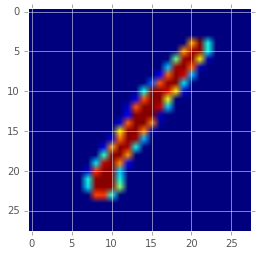

In [24]:
print(X_train[0,:])
print(len(X_train[0]) ** (1./2))
pylab.imshow(X_train[0].reshape(28, 28))

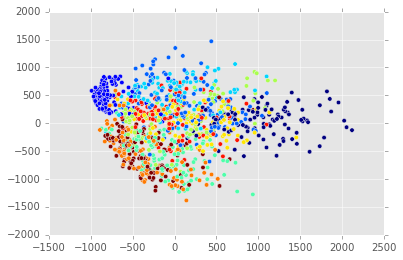

In [15]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_for_tsne)